In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.decomposition
%matplotlib notebook

# Dimensionality Reduction

Suppose we want to reduce dimensionality from $d$ to $d'$:

**Given**: $n$ vectors $\vec x^{(1)}, \ldots, \vec x^{(n)}$.

**Goal**: Map to vectors $\vec z^{(1)}, \ldots, \vec z^{(n)}$
by minimizing reconstruction error.


Before: $z^{(i)} = \vec x^{(i)} \cdot \hat v$, where $\hat v$ is top
eigenvector of $X X^\intercal$.

Now: 
$$
    \vec{z}^{(i)} =
    \begin{pmatrix}
        \vec{x}^{(i)} \cdot \hat v^{(1)}\\
        \vec{x}^{(i)} \cdot \hat v^{(2)}\\
        \vdots\\
        \vec{x}^{(i)} \cdot \hat v^{(d')}
    \end{pmatrix}
$$
Where $\hat v^{(k)}$ is the eigenvector of $X X^\intercal$ with $k$th largest
eigenvalue.

## Insructions for PCA

Assume that $\vec{x}^{(1)}, \ldots, \vec{x}^{(n)}$ are centered.

1. Create matrix $X$ whose $i$th colum is $\vec x^{(i)}$
2. Compute top $d'$ eigenvectors $\hat v^{(1)}, \ldots, \hat v^{(2)}$ of $X X^\intercal$
3. For every data point $\vec x^{(i)}$, compute
$$
    \vec{z}^{(i)} =
    \begin{pmatrix}
        \vec{x}^{(i)} \cdot \hat v^{(1)}\\
        \vec{x}^{(i)} \cdot \hat v^{(2)}\\
        \vdots\\
        \vec{x}^{(i)} \cdot \hat v^{(d')}
    \end{pmatrix}
$$

Alternatively: let $V$ be matrix whose $i$th column is $i$th eigenvector of $X X^t$.

Then $\vec z^{(i)}$ is the $i$th column of $V^\intercal X$.

# Example: Congressional Voting

`house-votes-84.data` contains the voting record of every member of the 1984 House of Representatives. In particular, it contains whether each representative voted yes, no, or abstained on each of 16 different bills. As such, each congressperson is a point in $\mathbb R^{16}$. We can't visualize such high-dimensional data, but if we could we'd expect to see a cluster of Republicans and a cluster of Democrats.

In this notebook, we'll use a method called PCA to reduce the dimensionality from 16 to 2 in order to visualize it.

In [9]:
data = pd.read_csv('house-votes-84.data', header=None).sample(frac=1)
data = data.replace({'y': 1, 'n': 0, '?': .5, 'republican': 0, 'democrat': 1})
points = data.iloc[:,1:].values
labels = data.iloc[:,0].values

In [11]:
points.shape

(435, 16)

First we will center the data. The mean of each dimension is:

In [14]:
mu = points.mean(axis=0)
mu

array([0.44367816, 0.50344828, 0.59425287, 0.41954023, 0.5045977 ,
       0.63793103, 0.56551724, 0.57356322, 0.50114943, 0.5045977 ,
       0.36896552, 0.42873563, 0.5091954 , 0.58965517, 0.43218391,
       0.73793103])

We subtract $\mu$ from each row of `points`:

In [17]:
centered = points - mu

And now we see that the mean of each dimension is zero (or really close to zero).

In [19]:
centered.mean(axis=0)

array([ 5.71701052e-17,  2.65432631e-17, -2.85850526e-17,  3.16477368e-17,
        5.10447368e-17, -6.58477104e-17, -9.18805262e-18,  4.08357894e-18,
        3.47104210e-17,  4.69611578e-17,  2.04178947e-17,  4.49193684e-17,
       -7.45253157e-17,  4.28775789e-17, -3.06268421e-17, -1.02089474e-17])

Now we construct the matrix $X$. This is the matrix whose $i$th column is the $i$th data vector. But the data vectors are currently the *rows* of `centered`. Therefore, we can construct $X$ by simply transposing `centered`:

In [20]:
X = centered.T

Now we need to compute the top two eigenvectors of $X X^\intercal$. We will use `np.linalg.eigh` to do so:

In [23]:
eigvals, eigvecs = np.linalg.eigh(X @ X.T)

Here are the top two eigenvectors:

In [29]:
V = eigvecs[:,-2:]
V

array([[-0.19920782,  0.19169881],
       [-0.60102397, -0.05211492],
       [-0.08166275,  0.29440739],
       [ 0.13029856, -0.31412873],
       [-0.04967083, -0.33667273],
       [-0.08147918, -0.256356  ],
       [ 0.18873074,  0.29328799],
       [ 0.05683749,  0.32414292],
       [ 0.16030203,  0.30337851],
       [ 0.45831203, -0.01285524],
       [-0.47614922,  0.06662625],
       [ 0.1517043 , -0.28358027],
       [-0.08940366, -0.27744415],
       [ 0.14293732, -0.28580791],
       [-0.01197733,  0.24410937],
       [ 0.11592064,  0.09858108]])

We transform the data by computing $V^\intercal X$:

In [37]:
Z = V.T @ X

Now the $i$th column of $Z$ is the low-dimensional representation of $\vec{x}^{(i)}$:

In [38]:
Z[:,42]

array([-0.04941899,  1.44632591])

Because the new representation is 2-dimensional, we can plot it:

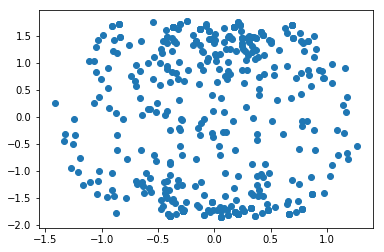

In [40]:
plt.scatter(*Z)

We recognize that the data points form two distinct "dense" regions. We hypothesize that one of these groups consists of Republicans, and another consists of Democrats. If we superimpose the actual party membership, we'll see that this is right:

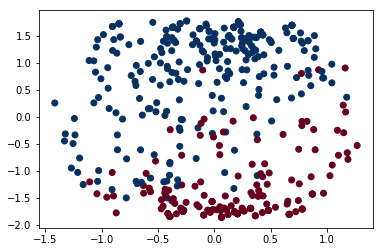

In [42]:
plt.scatter(*Z, c=labels, cmap='RdBu')